# Single Neuron Logistic Regression

---
## Table of contents

* [Introduction](*in)
* [Simple Logistic Regression](*si)
* [Analysis of the hypothesis](*an)
* [Types of Logistic Regression](*ty)
* [Application on Data sets](*ap)
* [The Logistic Single Neuron Model with Multiple Feature Inputs](*th)
---

## Introduction<a class="anchor" id="in"></a >

![image](https://thedatafrog.com/static/blog/images/2019/01/one_neuron.49288164e12e.png)

Basically, logistic regression is a feed-forward neural network without a hidden layer, where the output layer directly connects with the input layer. In other words, logistic regression is a single neuron that maps the input to the output layer. Theoretically, the neural networks with an additional hidden layer between the input and output layer should be able to learn more about the relationship underneath.

A single-layer neural network for two possible classes can be represented graphically as follows:
![image](https://www.oreilly.com/library/view/r-deep-learning/9781788478403/assets/780dd3e4-4795-4734-b188-9fb34de0ab5e.png)

Logistic Regression was used in the biological sciences in early twentieth century. It was then used in many social science applications. Logistic Regression is used when the dependent variable(target) is categorical.
For example,

To predict whether an email is spam (1) or (0)
Whether the tumor is malignant (1) or not (0)

Consider a scenario where we need to classify whether an email is spam or not. If we use linear regression for this problem, there is a need for setting up a threshold based on which classification can be done. Say if the actual class is malignant, predicted continuous value 0.4 and the threshold value is 0.5, the data point will be classified as not malignant which can lead to serious consequence in real time.

From this example, it can be inferred that linear regression is not suitable for classification problem. Linear regression is unbounded, and this brings logistic regression into picture. Their value strictly ranges from 0 to 1.

---
## Simple Logistic Regression<a class="anchor" id="si"></a >

Model
Output = 0 or 1
Hypothesis => Z = WX + B
hΘ(x) = sigmoid (Z)

Sigmoid Function
![image](https://miro.medium.com/max/1400/1*RqXFpiNGwdiKBWyLJc_E7g.png)
If ‘Z’ goes to infinity, Y(predicted) will become 1 and if ‘Z’ goes to negative infinity, Y(predicted) will become 0.

---
## Analysis of the hypothesis<a class="anchor" id="an"></a >

The output from the hypothesis is the estimated probability. This is used to infer how confident can predicted value be actual value when given an input X. Consider the below example,
X = [x0 x1] = [1 IP-Address]
Based on the x1 value, let’s say we obtained the estimated probability to be 0.8. This tells that there is 80% chance that an email will be spam.

Mathematically this can be written as,
![image](https://miro.medium.com/max/1096/1*i_QQvUzXCETJEelf4mLx8Q.png)

This justifies the name ‘logistic regression’. Data is fit into linear regression model, which then be acted upon by a logistic function predicting the target categorical dependent variable.

---
## Types of Logistic Regression<a class="anchor" id="ty"></a >
1. Binary Logistic Regression
The categorical response has only two 2 possible outcomes. Example: Spam or Not
2. Multinomial Logistic Regression
Three or more categories without ordering. Example: Predicting which food is preferred more (Veg, Non-Veg, Vegan)
3. Ordinal Logistic Regression
Three or more categories with ordering. Example: Movie rating from 1 to 5

---
## Application on Data sets<a class="anchor" id="ap"></a >

In [2]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import a nice function for plotting decision boudaries
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme
sns.set_theme()

# Read the palmerpenguins dataset into a pandas DataFrame object
df = pd.read_csv("palmer_penguins.csv")
df.dropna(inplace = True)
df.drop("Unnamed: 0", axis = 1, inplace = True)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [3]:
df.tail(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,Male


In [8]:
df.head(150)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
151,Adelie,Dream,41.5,18.5,201.0,4000.0,Male
152,Chinstrap,Dream,46.5,17.9,192.0,3500.0,Female
153,Chinstrap,Dream,50.0,19.5,196.0,3900.0,Male
154,Chinstrap,Dream,51.3,19.2,193.0,3650.0,Male


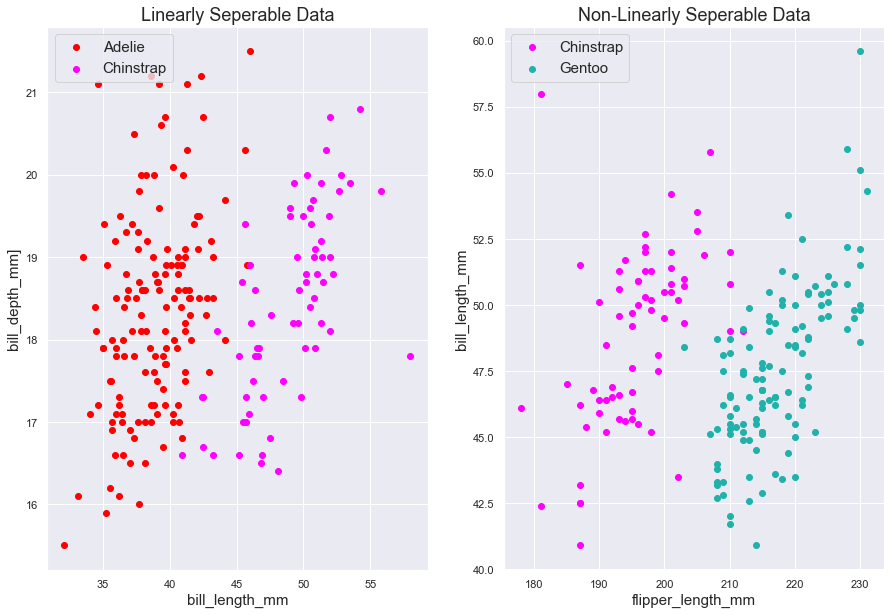

In [11]:
ad = df[df["species"]=="Adelie"]
ch = df[df["species"]=="Chinstrap"]
ge = df[df["species"]=="Gentoo"]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.scatter(ad.bill_length_mm, 
            ad.bill_depth_mm, 
            color = "red", 
            label = "Adelie")
ax1.scatter(ch.bill_length_mm, 
            ch.bill_depth_mm, 
            color = "magenta", 
            label = "Chinstrap")
ax1.set_xlabel("bill_length_mm", fontsize = 15)
ax1.set_ylabel("bill_depth_mm]", fontsize = 15)
ax1.legend(fontsize = 15, loc = "upper left")
ax1.set_title("Linearly Seperable Data", fontsize = 18)

ax2.scatter(ch.flipper_length_mm, 
            ch.bill_length_mm, 
            color = "magenta", 
            label = "Chinstrap")
ax2.scatter(ge.flipper_length_mm, 
            ge.bill_length_mm, 
            color = "lightseagreen", 
            label = "Gentoo")
ax2.set_xlabel("flipper_length_mm", fontsize = 15)
ax2.set_ylabel("bill_length_mm", fontsize = 15)
ax2.legend(fontsize = 15, loc = "upper left")
ax2.set_title("Non-Linearly Seperable Data", fontsize = 18)
plt.show()



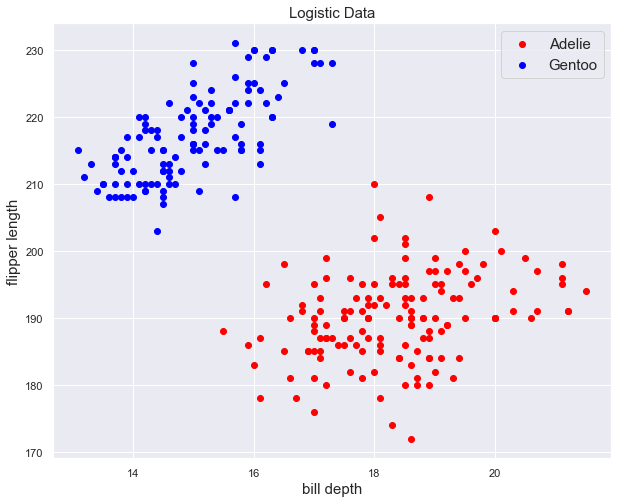

In [22]:
plt.figure( figsize = (10,8))
plt.scatter(ad.bill_depth_mm,
           ad.flipper_length_mm,
           color = "red", 
        label = "Adelie")
plt.scatter(ge.bill_depth_mm,
           ge.flipper_length_mm,
           color = "blue", 
        label = "Gentoo")
plt.xlabel("bill depth", fontsize = 15)
plt.ylabel("flipper length", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Logistic Data", fontsize = 15)
plt.show()

From the output, we can see that when bill depth is larger than 17, the probability of selecting Adeile is higher than that of Gentoo. And when flipper depth is smaller than 200, the probability of selecting Adelie species is higher than that of Gentoo species too.

In [24]:
X = pd.concat([ad[['species','bill_depth_mm','flipper_length_mm']],
                   ge[['species','bill_depth_mm','flipper_length_mm']]])
y = np.where(X.species == "Adelie", 0, 1)
X_two = X[['bill_depth_mm','flipper_length_mm']].values

# split the data to train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_two, 
                                                   y,
                                                   test_size = 0.4,
                                                   random_state = 3)


## The Logistic Single Neuron Model with Multiple Feature Inputs<a class="anchor" id="th"></a >

In [26]:
class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.
    
    cost_function : function
        The cost function used to measure model performance.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """
    def __init__(self, activation_function, cost_function):
        self.activation_function = activation_function
        self.cost_function = cost_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
   
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                self.w_[:-1] -= alpha*(self.predict(xi) - target)*xi
                self.w_[-1] -= alpha*(self.predict(xi) - target)
                #errors += .5*((self.predict(xi) - target)**2)
                errors += self.cost_function(self.predict(xi), target)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)


    def plot_cost_function(self):
        fig, axs = plt.subplots(figsize = (10, 8))
        axs.plot(range(1, len(self.errors_) + 1), 
                self.errors_,
                label = "Cost function")
        axs.set_xlabel("epochs", fontsize = 15)
        axs.set_ylabel("Cost", fontsize = 15)
        axs.legend(fontsize = 15)
        axs.set_title("Cost Calculated after Epoch During Training", fontsize = 18)
        plt.show()

    def plot_decision_boundary(self, X, y, xstring="x", ystring="y"):
        plt.figure(figsize = (10, 8))
        plot_decision_regions(X, y, clf = self)
        plt.title("Logistic Regression Neuron Decision Boundary", fontsize = 18)
        plt.xlabel(xstring, fontsize = 15)
        plt.ylabel(ystring, fontsize = 15)
        plt.show()

In [27]:
# sigmoid function
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

#cost function
def cross_entropy_loss(y_hat, y):
    return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)

/var/folders/67/mfljkgys58j8nvt5sc_yf86w0000gn/T/ipykernel_22976/3686059045.py:7: RuntimeWarning: divide by zero encountered in log
  return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)
/var/folders/67/mfljkgys58j8nvt5sc_yf86w0000gn/T/ipykernel_22976/3686059045.py:7: RuntimeWarning: invalid value encountered in multiply
  return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)


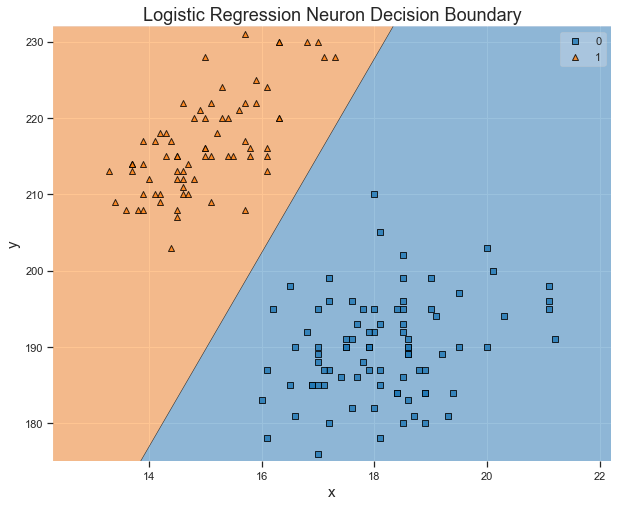

In [38]:
# Instantiate a new single neuron.
node_two = SingleNeuron(sigmoid, cross_entropy_loss)

# Create a numpy.ndarray of petal length and sepal length values for
# the versicolor and virginica flowers, respectively.
node_two.train(X_train, y_train, alpha = 0.01, epochs = 5000)
# Train the new single neuron model on the new feature vectors.
node_two.plot_decision_boundary(X_train, y_train)

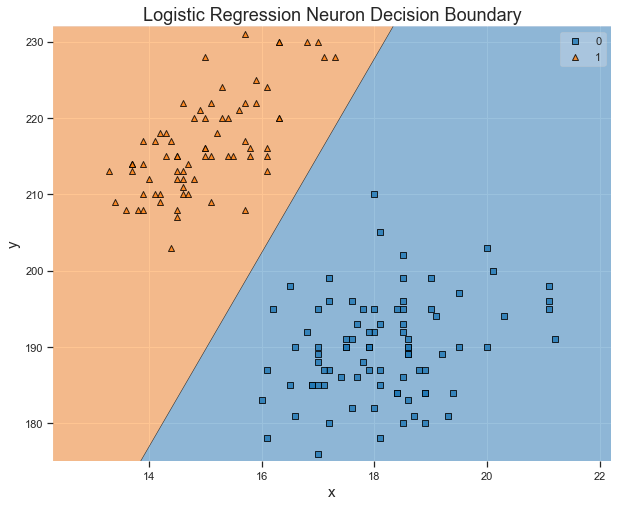

In [39]:
node_two.plot_decision_boundary(X_train, y_train)

## Confusion matrix

In [42]:
classification_error = (np.rint(node_two.predict(X_test)) != y_test).astype(int)
print(f"Classification Error = {sum(classification_error)/ len(y_test)}")
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(f"Logistic Regression Classification Report")
print(classification_report(y_test, np.rint(node_two.predict(X_test))), "\n")

confusion_m = confusion_matrix(y_test, np.rint(node_two.predict(X_test)))


Classification Error = 0.0
Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        46

    accuracy                           1.00       106
   macro avg       1.00      1.00      1.00       106
weighted avg       1.00      1.00      1.00       106
 

